## Titanic Decision Tree
This note book is built by refering the kaggle notebook 'Titanic Data Science Solutions'
https://www.kaggle.com/startupsci/titanic-data-science-solutions

Firstly we will import required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image
import seaborn as sns

### Load data
Load the data into pandas data frame

In [2]:
df = pd.read_csv("Data/train.csv")
print(df.shape)

(891, 12)


### View the colums

In [3]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### View few records of data

In [4]:
print('Head data: ')
df.head(10)

Head data: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print('Tail Data: ')
df.tail(10)

Tail Data: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### View the data types of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Data pruning
The features of the data:
1. __PassangerId :__ Unique Id for each passanger
2. __Survived :__ This is the target column. 0 not survived 1 survived
3. __Pclass :__ Socio economic status of the passanger. 1 - Upper, 2- Lower, 3 - middle
4. __Name :__ Name of the passanger. Continious string values
5. __Sex :__ Sex of the passanger. discrete values male and female
6. __Age :__ Age of the passanger. Age is fractional if less than 1. Continious float. There are lot of NaN values
7. __SibSp :__ # of siblings / spouses aboard the Titanic. Continious integer
8. __Parch :__ # of parents / children aboard the Titanic. Continoius integer
9. __Ticket :__ Ticket Number. Number or Alpha Numeric and continious.
10. __Fare :__ Cost of the ticket. Continious number
11. __Cabin :__ Cabin Number. Alpha numeric and repeated . Lot of Nan values
12. __Embarked :__ Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

The Cabin column has lot of Nan values and continious alpa numeric so we can drop it.<br>
The Ticket column though it does not have lot of Nan Values but since it is continious object and it has no numerical significance we can drop it

In [7]:
df = df.drop(['Cabin','Ticket'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


There are only two nan values of embarked so we can fill it up with the max occuring port

In [8]:
portEmb = df[['Embarked','Survived']].groupby('Embarked').sum()
portEmb

,Survived
Embarked,
C,93
Q,30
S,217


In [9]:
df['Embarked'] = df['Embarked'].fillna('S')

### Extracting Features

#### Title from Name
By viewing the data in the column 'Name' it can be determined that there is a discrete feature Title of the name. It could be a good feature<br>
We will try to extract this feature

In [10]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df[['Title', 'Survived']].groupby(['Title'], as_index=False).count()

,Title,Survived
0,Capt,1
1,Col,2
2,Countess,1
3,Don,1
4,Dr,7
5,Jonkheer,1
6,Lady,1
7,Major,2
8,Master,40
9,Miss,182


There are 16 different titles <br> The more common ones are Mr, Mrs, Miss, Master
So we can club all the uncommon titles under one category namely Rare

In [11]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


So by above details we now have more insight in the 'Title' column. <br>
People with title Mrs. have survied the most and the people with title Mr. have survived the least<br>
Now we can drop the column 'Name'

### Getting missing age values
Since now we have the title column there is a general sense that the ages of the people having same title may be in a same range. So we can take fill in the missing values of the ages with the mean Age of all the people having the same title.

In [12]:
#Getting the mean of the ages grouped by the title
titleAgeAvg = df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()
print(titleAgeAvg)

    Title        Age
0  Master   4.574167
1    Miss  21.845638
2      Mr  32.368090
3     Mrs  35.788991
4    Rare  45.545455


In [13]:
#Setting the missing ages of every group of title
df.loc[(df.Age.isnull()) & (df.Title == 'Master'),'Age'] = 4.57
df.loc[(df.Age.isnull()) & (df.Title == 'Miss'),'Age'] = 21.8
df.loc[(df.Age.isnull()) & (df.Title == 'Mr'),'Age'] = 32.3
df.loc[(df.Age.isnull()) & (df.Title == 'Mrs'),'Age'] = 35.7
df.loc[(df.Age.isnull()) & (df.Title == 'Rare'),'Age'] = 45.5

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [15]:
df = df.drop(['Name'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


We can convert the categorical titles to ordinal.

In [16]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


#### IsAlone from SibSp and Parch
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.
Instead of using the number of siblings and parents aboard the ship we can extract a new feature called IsAlone which will indicate that if the person was travelling alone or was with any of the family members

In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [18]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [19]:
df = df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,male,22.0,7.2500,S,1,0
1,2,1,1,female,38.0,71.2833,C,3,0
2,3,1,3,female,26.0,7.9250,S,2,1
3,4,1,1,female,35.0,53.1000,S,3,0
4,5,0,3,male,35.0,8.0500,S,1,1


#### AgeBand from Age
We can create a categorical feature called age band instead of using the continious feature age

In [20]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.392670
2,"(32.252, 48.168]",0.320000
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [21]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']
df['Age'] = df['Age'].astype('int')
df = df.drop(['AgeBand'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,male,1,7.2500,S,1,0
1,2,1,1,female,2,71.2833,C,3,0
2,3,1,3,female,1,7.9250,S,2,1
3,4,1,1,female,2,53.1000,S,3,0
4,5,0,3,male,2,8.0500,S,1,1


### FareBand from fare

In [22]:
df['FareBand'] = pd.qcut(df['Fare'] , 4)
df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [23]:
df.loc[ df['Fare'] <= 8.05, 'Fare'] = 0
df.loc[ (df['Fare'] > 8.05) & (df['Fare'] <= 15.742), 'Fare'] = 1
df.loc[ (df['Fare'] > 15.742) & (df['Fare'] <= 33.375), 'Fare'] = 2
df.loc[ df['Fare'] > 33.375, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)
df = df.drop('FareBand', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,male,1,0,S,1,0
1,2,1,1,female,2,3,C,3,0
2,3,1,3,female,1,0,S,2,1
3,4,1,1,female,2,3,S,3,0
4,5,0,3,male,2,0,S,1,1


### Converting categorical feature to numeric
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us convert Sex feature to numeric where female=1 and male=0.<br>
Let us convert Embarked feature to numeric S=0, C=1, Q=2

In [24]:
df.groupby(['Sex'], as_index=False).count()

,Sex,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,IsAlone
0,female,314,314,314,314,314,314,314,314
1,male,577,577,577,577,577,577,577,577


In [25]:
df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1}).astype(int)
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1,0,0,1,0
1,2,1,1,1,2,3,1,3,0
2,3,1,3,1,1,0,0,2,1
3,4,1,1,1,2,3,0,3,0
4,5,0,3,0,2,0,0,1,1


### Analyzing each feature independently
Now we will analyze each catogorical data indipendently againg the survived column.

#### Pclass

In [26]:
pclassdf = df[['Pclass','Survived']].groupby('Pclass').mean()
pclassdf['Survived'] = pclassdf['Survived'] * 100
pclassdf

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [27]:
pclassdf = df[['Pclass','Survived']].groupby('Pclass').sum()
pclassdf['NumberofPassangers'] = df[['Pclass','Survived']].groupby('Pclass').count()
pclassdf

,Survived,NumberofPassangers
Pclass,,
1,136,216
2,87,184
3,119,491


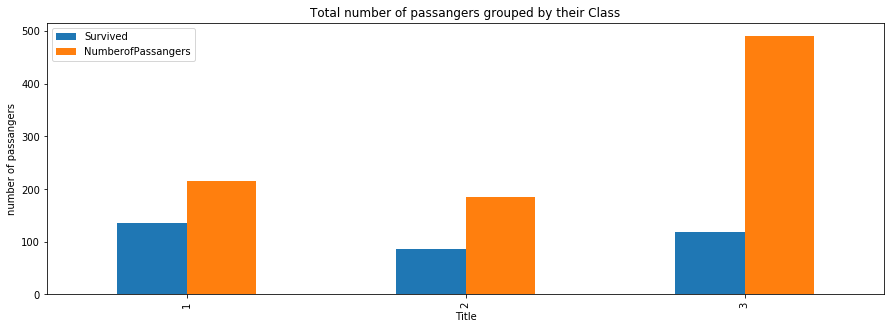

In [28]:
fig, ax = plt.subplots(figsize=[15,5])
pclassdf.plot.bar(ax = ax)
ax.set(title='Total number of passangers grouped by their Class', xlabel='Title', ylabel='number of passangers');

#### Title

In [29]:
titledf = df[['Title','Survived']].groupby('Title').sum()
titledf['TotalNumberofPassangers'] = df[['Title','Survived']].groupby('Title').count()
titledf

,Survived,TotalNumberofPassangers
Title,,
1,81,517
2,130,185
3,100,126
4,23,40
5,8,23


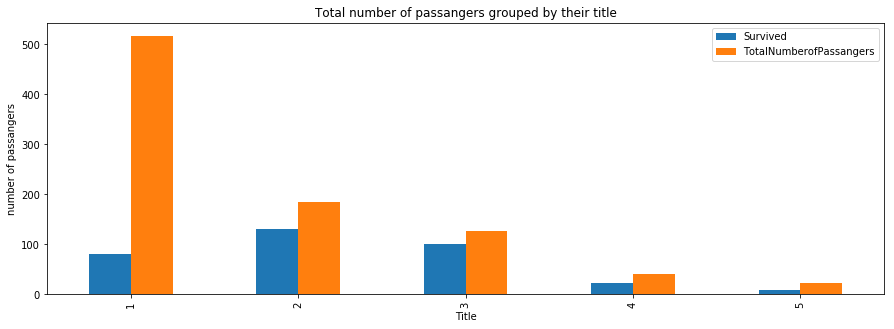

In [30]:
fig, ax = plt.subplots(figsize=[15,5])
titledf.plot.bar(ax = ax)
ax.set(title='Total number of passangers grouped by their title', xlabel='Title', ylabel='number of passangers');

#### Sex

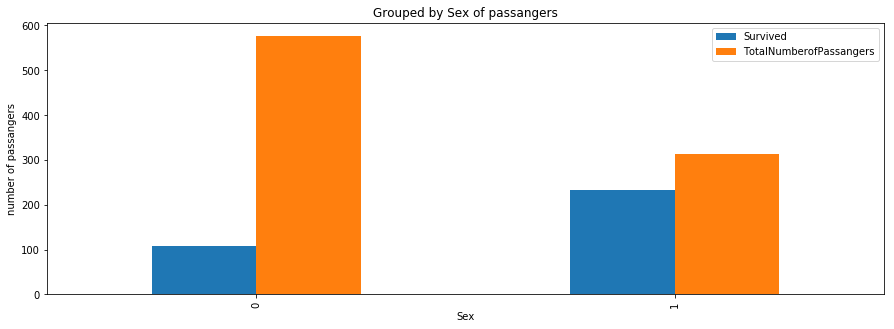

In [31]:
titledf = df[['Sex','Survived']].groupby('Sex').sum()
titledf['TotalNumberofPassangers'] = df[['Sex','Survived']].groupby('Sex').count()
fig, ax = plt.subplots(figsize=[15,5])
titledf.plot.bar(ax = ax)
ax.set(title='Grouped by Sex of passangers', xlabel='Sex', ylabel='number of passangers');

#### Port Embarker

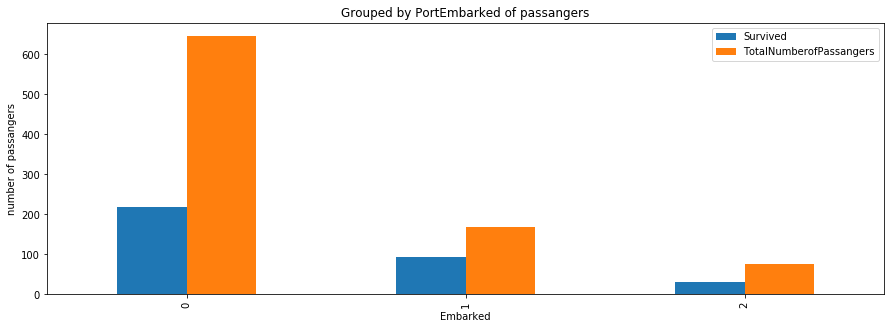

In [32]:
titledf = df[['Embarked','Survived']].groupby('Embarked').sum()
titledf['TotalNumberofPassangers'] = df[['Embarked','Survived']].groupby('Embarked').count()
fig, ax = plt.subplots(figsize=[15,5])
titledf.plot.bar(ax = ax)
ax.set(title='Grouped by PortEmbarked of passangers', xlabel='Embarked', ylabel='number of passangers');

### Model Creation
Now we will make the model using sklearn Decision tree classifier

#### Split the data into test and train

In [37]:
np.random.seed(1)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
X_train = train.drop(['Survived','PassengerId'],axis = 1)
X_test = test.drop(['Survived','PassengerId'],axis = 1)
Y_train = train['Survived']
Y_test = test['Survived']

In [38]:
print('X_train' + str(X_train.shape))
print('Y_train' + str(Y_train.shape))
print('X_test' + str(X_test.shape))
print('Y_test' + str(Y_test.shape))

X_train(715, 7)
Y_train(715L,)
X_test(176, 7)
Y_test(176L,)


In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
train_acc = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_acc = round(decision_tree.score(X_test, Y_test) * 100, 2)
print('train_acc : '+str(train_acc))
print('test_acc : '+str(test_acc))

train_acc : 86.85
test_acc : 85.23


With decision tree classifier we have test accurecy of 85.23%